# Testing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Persamaan Metrik Akurasi Skor-Q
$$Q_s =  \frac{∑^s_{i=1} C_i}{n}×100\%$$

Di mana:
- $C_i$ = Jumlah residu yang terprediksi dengan benar
- $n$ = Jumlah residu yang terprediksi
- $s$ = Jumlah State yang ada (8 state atau 3 state)

## Akurasi Q8 

In [2]:
def get_test_data(dataset_name):
    """
    Retrieve the prediction and test data for a given dataset. 
    """
    df = pd.read_csv(f"../Data/Postprocessed/{dataset_name}_dssp.csv")
    dataset_name = dataset_name.upper()
    df_test = pd.read_csv(f"../Data/Preprocessed/{dataset_name}_preprocessed.csv")
    return df, df_test

In [3]:
# Get the data for testing
df_casp12, df_test_casp12 = get_test_data('casp12')

In [4]:
df_casp12.head()

,id,length,residue,predicted_dssp8
0,0,670,MSAETVNNYDYSDWYENAAPTKAPVEVIPPCDPTADEGLFHICIAA...,----------GGGGTTT----------------SS-HHHHHHHHHH...
1,1,1494,ETGQVAASPSINVALKAAFPSPPYLVELLETAASDNTTIYYSLLDR...,------PPPEEEEEEEEEEEPPPHHHHHHHHHHTT-HHHHHHHHHH...
2,2,358,MAHHHHHHMAISPRDEQNRSVDLWFAYKVPKLTKDADSDSASGYEY...,--------PPP--B-TTS-B-SEEEEEEPPPB---SS---B-S--E...
3,3,165,MHHHHHHENLYFQTSIRTEPTYTLYATFDNIGGLKARSPVSIGGVV...,--------------------EEEEEEE-S--TT--TT-EEEETTEE...
4,4,346,MGHHHHHHGGSENLYFQGNEDILKASATQSAVAGTYQIQVNSLATS...,---------SS--EEEES-TTTEEEEE-TTPPPEEEEEEEEE--BE...


In [5]:
df_test_casp12

,id,length,residue,dssp8,dssp3
0,0,455,MHHHHHHENLYFQSHQGPEVTLITANAEGIEGGKTTIKSRSVDVGV...,CCCCCCCCCCCCCCCCCCEEEEEESCCTTCCTTTCEEEETTEEEEE...,CCCCCCCCCCCCCCCCCCEEEEEECCCCCCCCCCCEEEECCEEEEE...
1,1,670,MSAETVNNYDYSDWYENAAPTKAPVEVIPPCDPTADEGLFHICIAA...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHH...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHH...
2,2,1494,ETGQVAASPSINVALKAAFPSPPYLVELLETAASDNTTIYYSLLDR...,CCCCCCCCCEEEEEEEEEEECCCHHHHHHHHHSSSCHHHHHHHHHH...,CCCCCCCCCEEEEEEEEEEECCCHHHHHHHHHCCCCHHHHHHHHHH...
3,3,358,MAHHHHHHMAISPRDEQNRSVDLWFAYKVPKLTKDADSDSASGYEY...,CCCCCCCCCCCCCBCTTSCBCSEEEEEECCCEEEETTEEEECSCCE...,CCCCCCCCCCCCCECCCCCECCEEEEEECCCEEEECCEEEECCCCE...
4,4,165,MHHHHHHENLYFQTSIRTEPTYTLYATFDNIGGLKARSPVSIGGVV...,CCCCCCCCCCCCCCCCCCCCEEEEEEECSCCTTCCTTCEEEETTEE...,CCCCCCCCCCCCCCCCCCCCEEEEEEECCCCCCCCCCCEEEECCEE...
5,5,346,MGHHHHHHGGSENLYFQGNEDILKASATQSAVAGTYQIQVNSLATS...,CCCCCCCCCCCCCCCCCCCCCCSEEEEESSCCCEEEEEEEEECCBE...,CCCCCCCCCCCCCCCCCCCCCCCEEEEECCCCCEEEEEEEEECCEE...
6,6,76,SRGPSNGQSVLENSVQVKETSPRRVSVDPQTGEFVVFDRTLGDVYH...,CCCCSSHHHHHHTCEEEETTEEEEEEECTTTCCEEEEEEEETTEEE...,CCCCCCHHHHHHCCEEEECCEEEEEEECCCCCCEEEEEEEECCEEE...
7,7,106,MGAEEEDTAILYPFTISGNDRNGNFTINFKGTPNSTNNGCIGYSYN...,CCCCCTTTSEEEEEECCSSCCCSEEEEEEEESTTCEEEEEEEEEET...,CCCCCCCCCEEEEEECCCCCCCCEEEEEEEECCCCEEEEEEEEEEC...
8,8,120,KMAGSIVISKEVRVPVSTSQFDYLVSRIGDQFHSSDMWIKDEVYLP...,CCCEEEEEETTEEEEECHHHHHHHHHHHHTTCCGGGHHHHHHHHHH...,CCCEEEEEECCEEEEECHHHHHHHHHHHHCCCCHHHHHHHHHHHHH...
9,9,161,MGASSGSNISASNGSSSPTTIVASNPVDLNAFDRLNVVDPAVGKFR...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...


In [6]:
# drop the first row
df_test_casp12 = df_test_casp12.drop(df_test_casp12.index[0])
df_test_casp12 = df_test_casp12.reset_index(drop=True)

| Code | Structure                     |
|------|-------------------------------|
| H    | Alpha helix (4-12)            |
| B    | Isolated beta-bridge residue  |
| E    | Strand                        |
| G    | 3-10 helix                    |
| I    | Pi helix                      |
| T    | Turn                          |
| S    | Bend                          |
| C    | Coil                          | 

- Some dataset may use different code for the last structure, such as space '' or 'L', but in this case we use 'C'
- DSSP version 4 predicts can predict P state but it is not used in this case, so we convert it to 'I'

In [7]:
# Standarkan format struktur sekunder prediksi menggunakan regex
df_casp12['predicted_dssp8'] = df_casp12['predicted_dssp8'].str.replace('-', 'C', regex=True)
df_casp12['predicted_dssp8'] = df_casp12['predicted_dssp8'].str.replace('P', 'I', regex=True)

In [8]:
df_casp12

,id,length,residue,predicted_dssp8
0,0,670,MSAETVNNYDYSDWYENAAPTKAPVEVIPPCDPTADEGLFHICIAA...,CCCCCCCCCCGGGGTTTCCCCCCCCCCCCCCCCSSCHHHHHHHHHH...
1,1,1494,ETGQVAASPSINVALKAAFPSPPYLVELLETAASDNTTIYYSLLDR...,CCCCCCIIIEEEEEEEEEEEIIIHHHHHHHHHHTTCHHHHHHHHHH...
2,2,358,MAHHHHHHMAISPRDEQNRSVDLWFAYKVPKLTKDADSDSASGYEY...,CCCCCCCCIIICCBCTTSCBCSEEEEEEIIIBCCCSSCCCBCSCCE...
3,3,165,MHHHHHHENLYFQTSIRTEPTYTLYATFDNIGGLKARSPVSIGGVV...,CCCCCCCCCCCCCCCCCCCCEEEEEEECSCCTTCCTTCEEEETTEE...
4,4,346,MGHHHHHHGGSENLYFQGNEDILKASATQSAVAGTYQIQVNSLATS...,CCCCCCCCCSSCCEEEESCTTTEEEEECTTIIIEEEEEEEEECCBE...
5,5,76,SRGPSNGQSVLENSVQVKETSPRRVSVDPQTGEFVVFDRTLGDVYH...,CIIITTHHHHHHTCEESCTTCCCEEEECTTTCCEEEEEECSSSCEE...
6,6,106,MGAEEEDTAILYPFTISGNDRNGNFTINFKGTPNSTNNGCIGYSYN...,CCCTTCCCCEEEEEECCSSCCCSEEEEEEEESTTCEEEEEEEEEET...
7,7,120,KMAGSIVISKEVRVPVSTSQFDYLVSRIGDQFHSSDMWIKDEVYLP...,CCCCEEESSSSCEEECCHHHHHHHHHHHHTTCCGGGHHHHHHHTHH...
8,8,161,MGASSGSNISASNGSSSPTTIVASNPVDLNAFDRLNVVDPAVGKFR...,CCCCCCCCCCCCCCCSSIEEECCCSIICHHHHHHHCCEETTTTEEC...
9,9,341,SLRFTASTSTPKSGSKIAKRGKKHPEPVASWMSEQRWAGEPEVMCT...,CCCCCCCCCCCCCCCCCCCCCCIIIIHHHHHHHHHTTCCCHHHHHH...


# Metrik Akurasi skor-Q (Q Average)
$$Q_{avg} = \frac{\sum{Q_s}}{n_{protein}}$$

Penjelasan:
- $Q_{avg}$ = Akurasi skor-Q rata-rata dari semua protein
- $Q_s$ = Akurasi skor-Q dari setiap protein
- $n_{protein}$ = Jumlah protein yang diuji

In [9]:
def calculate_q_score(predicted, actual):
    """
    Menghitung Q_s untuk satu protein.
    
    Args:
        predicted (str): Struktur sekunder yang diprediksi.
        actual (str): Struktur sekunder yang sebenarnya.
    
    Returns:
        float: Nilai Q_s dalam persen.
    """
    correct = sum(1 for p, a in zip(predicted, actual) if p == a)
    total = len(actual)
    return (correct / total) * 100 if total > 0 else 0


def calculate_q_average(predicted_list, actual_list):
    """
    Menghitung Q_avg untuk semua protein dalam dataset.
    
    Args:
        predicted_list (list of str): Daftar struktur sekunder yang diprediksi.
        actual_list (list of str): Daftar struktur sekunder yang sebenarnya.
    
    Returns:
        float: Nilai Q_avg dalam persen.
    """
    q_scores = [calculate_q_score(predicted, actual) for predicted, actual in zip(predicted_list, actual_list)]
    return sum(q_scores) / len(q_scores) if q_scores else 0

## Akurasi Q8

In [10]:
predicted_list = df_casp12['predicted_dssp8'].tolist()  # Struktur sekunder yang diprediksi
actual_list = df_test_casp12['dssp8'].tolist()  # Struktur sekunder yang sebenarnya

q8_avg = calculate_q_average(predicted_list, actual_list)
print(f"Q8_avg: {q8_avg:.2f}%")

Q8_avg: 79.45%


## Visualisasi Prediksi Protein Pertama (8-State)

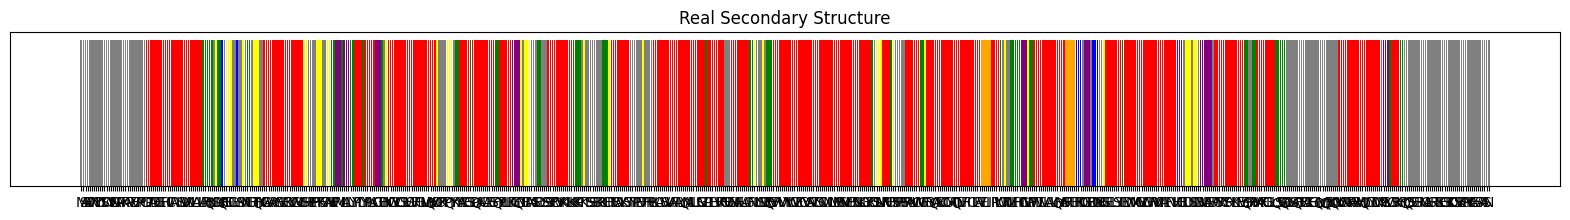

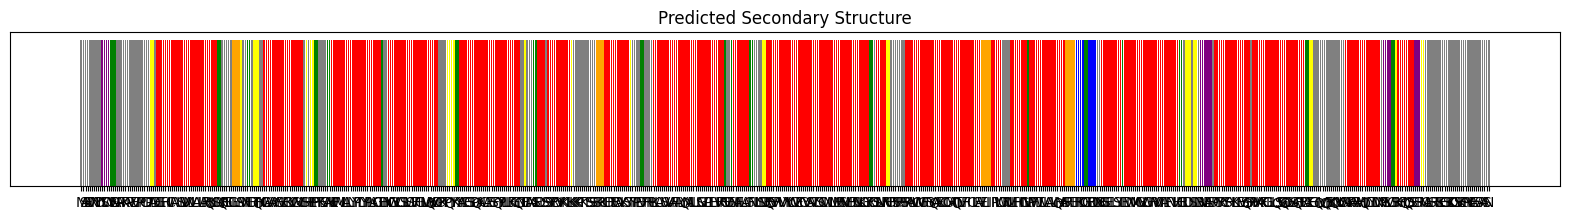

In [11]:
# Get the residue of the first protein
residu = df_casp12['residue'].iloc[0]

# Get the first protein's dssp8 predicted and actual secondary structure
predicted_ss = df_casp12['predicted_dssp8'].iloc[0]
actual_ss = df_test_casp12['dssp8'].iloc[0]

# Define colors for secondary structure elements using 8-state DSSP
colors = {'H': 'red', 'B': 'blue', 'E': 'blue', 'G': 'purple', 'I': 'orange', 'T': 'green', 'S': 'yellow', 'C': 'gray', 'L': 'black'}
# Plot
fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(actual_ss)), [1]*len(actual_ss), color=[colors[ss] for ss in actual_ss])
ax.set_xticks(range(len(actual_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=[colors[predicted_ss] for predicted_ss in predicted_ss])
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

In [12]:
# Akurasi Q8 protein pertama
q8_first_protein = calculate_q_score(predicted_ss, actual_ss)
print(f"Q8 for the first protein: {q8_first_protein:.2f}%")

Q8 for the first protein: 74.18%


## Akurasi Q3

Tabel Konversi Q8 ke Q3
| DSSP 8-Class | 3-Class |
|--------------|---------|
| H            | H       |
| G            | H       |
| I            | H       |
| B            | E       |
| E            | E       |
| T            | C       |
| S            | C       |
| C            | C       |

In [13]:
# Convert the original & predicted 8-state secondary structure to 3-state secondary structure
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

In [14]:
predicted_list_3state = [convert_8state_to_3state(ss) for ss in predicted_list]
actual_list_3state = [convert_8state_to_3state(ss) for ss in actual_list]

In [15]:
# Akurasi Q3 Rata-rata
q3_avg = calculate_q_average(predicted_list_3state, actual_list_3state)
print(f"Q3_avg: {q3_avg:.2f}%")

Q3_avg: 85.84%


# Visualisasi Prediksi Protein Pertama (3-State)

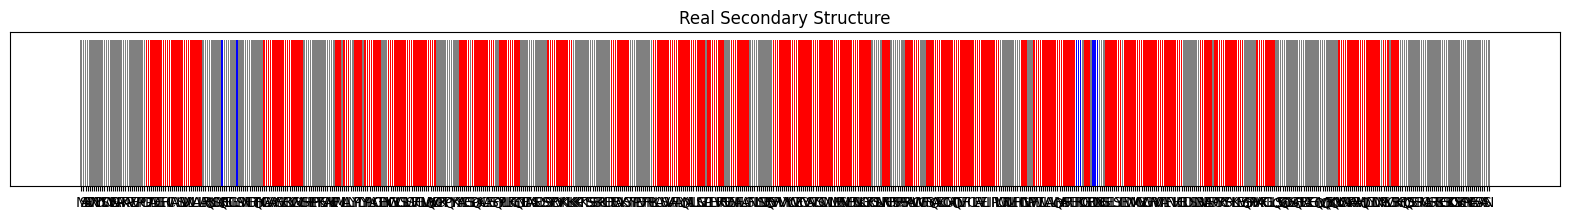

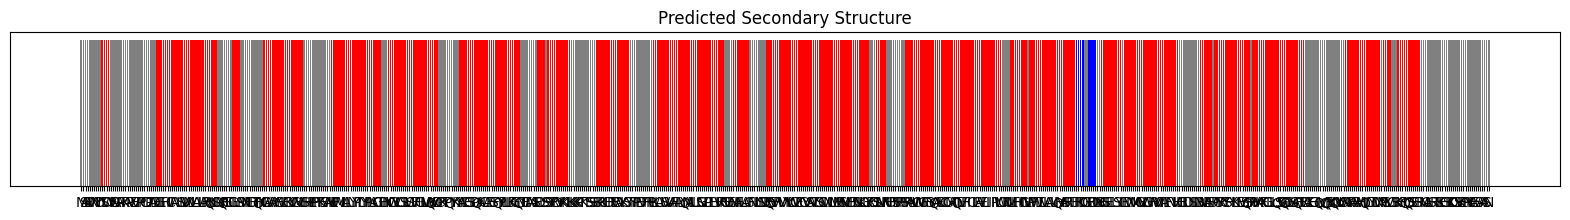

In [16]:
# Get the residue of the first protein
residu = df_casp12['residue'].iloc[0]

# Get the first protein's dssp3 predicted and actual secondary structure
predicted_ss = predicted_list_3state[0]
actual_ss = actual_list_3state[0]

# Define colors for secondary structure elements using 3-state DSSP
colors = {'H': 'red', 'E': 'blue', 'C': 'gray'}

# Plot
fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(actual_ss)), [1]*len(actual_ss), color=[colors[ss] for ss in actual_ss])
ax.set_xticks(range(len(actual_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=[colors[predicted_ss] for predicted_ss in predicted_ss])
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

In [17]:
# Akurasi Q3 protein pertama
q3 = calculate_q_score(predicted_ss, actual_ss)
print(f"Q3 for the first protein: {q3:.2f}%")

Q3 for the first protein: 83.43%
